# Near-Photon-Shells Demo Using Coordinate Time

First, we import the necessary modules.

In [1]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from fadge import GRRT
from jax   import numpy as np

from matplotlib import pyplot as plt
from itertools  import product

We then instasize `PRay` into an object

In [8]:
grrt = GRRT(
    aspin=0.9325, ind='time',
    eps=-1e-3, atol=1e-12, rtol=0, hmin=0,
    names={'ind':'t'},
    dtype=np.float64,
)

grrt.set_sphorbit(r=3.5)

Radius of outer event horizon: 1.3611699738350351


To setup the initial conditions, we first set the camera location, and then specify the image.

To performm geodesic integration, simply call `pray.geode()`.
When no argument is specified, the integration is carried out to `-2 * r_obs`.
The return values are the full steps during the integration.

In [9]:
l, f = grrt.geode(L=1000,N=100000) # full step output

ft = f[:,0,0]
fx = f[:,0,1]
fy = f[:,0,2]
fz = f[:,0,3]

jit(masked_do); input: Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>]


  6%|████▏                                                                | 6/100 [00:02<00:39,  2.36it/s, t=64.2, dt=0.0119   ]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

 14%|█████████▌                                                          | 14/100 [00:06<00:38,  2.23it/s, t=142., dt=0.0122   ]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

 18%|████████████▏                                                       | 18/100 [00:08<00:39,  2.07i

All equations were filtered out


Because `PRay` uses `XAJ` for solving ODEs, it supports dense output.
We can put a lot of sampling points near the black hole for better visualization of the geodeiscs.

We are finally ready to plot the results.

Text(0, 0.5, 'y')

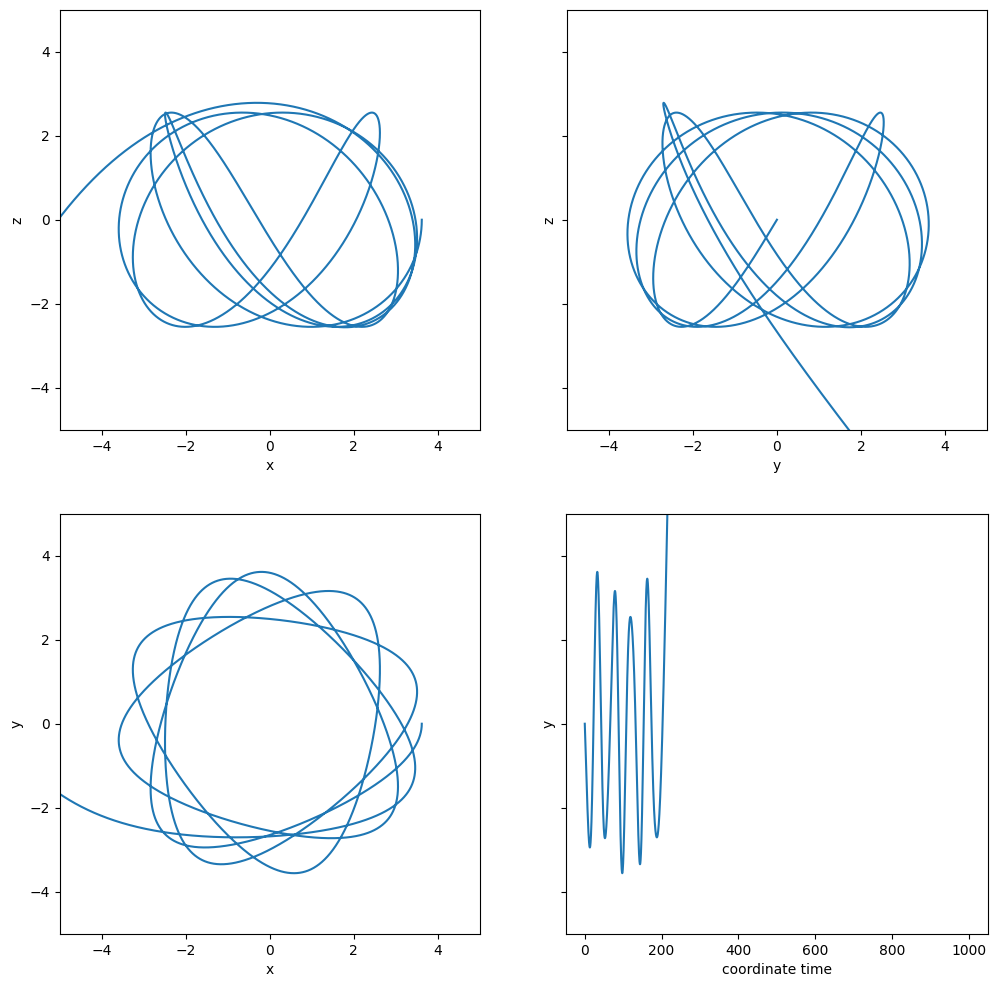

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharey=True)

lim = 5

axes[0][0].plot(fx, fz)
axes[0][1].plot(fy, fz)
axes[1][0].plot(fx, fy)
axes[1][1].plot(ft, fy)

#fig.tight_layout()

ax = axes[0][0]
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[0][1]
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[1][0]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[1][1]
ax.set_xlabel('coordinate time')
ax.set_ylabel('y')